# Surprise Housing - Advanced Regression Assignment
---

**Business Objective:** 

The goal is to use the available independent variables to model the cost of homes. The management will then utilize this model to determine exactly how the prices fluctuate depending on the variables. As a result, they can influence the company's strategy and concentrate on areas that will provide large returns. The model will also help management better understand how prices change in a new market.

The business would like to know -

- Which factors are important for estimating the price of a house.
- How effectively those factors accurately reflect the price of a house.


**Goals:**

- To model the cost of homes using the relevant independent variables.
- To understand the precise relationship between price variation and variable.
- To have an impact on the company's strategy and direct attention to areas that will yield high returns on investment.

---
**Importing Libraries & packages**

In [1]:
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# libraries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# libraries for train-test split, GridSearchCV, KFold & scaling
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# libraries for RFE, LinearRegression, Ridge & Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# libraries for getting statistical summary
import statsmodels.api as sm

# libraries for r2 & mean error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# libraries for sorting coefficient dictionary
import operator

**Supress Warnings**

In [2]:
import warnings
warnings.filterwarnings('ignore')

---
### The sections below outline our analysis:-

-  Data understanding and exploration
-  Data Cleaning
-  Data Visualization
-  Data Preparation
-  Model building and evaluation

---

# Data understanding and exploration
---

## Reading and Understanding the Data
---

In [3]:
# Importing a dataset with an index based on the id column

df_house = pd.read_csv('train.csv', index_col='Id')
df_house.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# examining the housing data frame's shape

df_house.shape

(1460, 80)

#### Observation: 

- The dataset consists of 1460 rows and 80 columns.

In [5]:
# examining various columns in the housing data frame

df_house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
# examining the numerical columns' statistics

df_house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# examining the variables' types and the presence of any null values

df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Observation: 

- We will need to create dummy variables for a few of the categorical variables in this dataset. There are a lot of null values as well, so we'll need to handle them properly.
- The data in the dataset is divided into three types: object, float64, and int64.

In [8]:
# checking the housing data frame for duplicate rows

df_house[df_house.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


#### Observation: 

- There are no duplicate values in the dataset.

In [9]:
# Finding the null values for the dataset's top 25 variables

df_house.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
Exterior1st        0
RoofStyle          0
ExterQual          0
Exterior2nd        0
YearBuilt          0
dtype: int64

In [10]:
# calculating the null percentage for the dataset's top 25 variables

((df_house.isnull().sum()/len(df_house.index))*100).sort_values(ascending=False).head(25)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
RoofMatl         0.000000
Exterior1st      0.000000
RoofStyle        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
YearBuilt        0.000000
dtype: float64

#### Observation: 

- NA values can be found in 19 of the columns. Let's examine each column that has NA values individually and determine what to do with them.

---

# Data Cleaning
---

## Handle missing values
---

**Before eliminating columns with a high percentage of null values, we must first exclude columns that are NA in the data dictionary, as NA indicates that such features are not present in some columns.**

We will now examine each of those columns and impute the NA values.

In [11]:
# According to the data dictionary, the columns below do not actually contain null values. As a result, we'll swap out NAs rather than eliminating them.

df_house['PoolQC'].fillna('No Pool', inplace=True)
df_house['MiscFeature'].fillna('None', inplace=True)
df_house['Alley'].fillna('No alley access', inplace=True)
df_house['Fence'].fillna('No Fence', inplace=True)
df_house['FireplaceQu'].fillna('No Fireplace', inplace=True)
df_house['GarageCond'].fillna('No Garage', inplace=True)
df_house['GarageType'].fillna('No Garage', inplace=True)
df_house['GarageFinish'].fillna('No Garage', inplace=True)
df_house['GarageQual'].fillna('No Garage', inplace=True)
df_house['BsmtQual'].fillna('No Basement', inplace=True)
df_house['BsmtCond'].fillna('No Basement', inplace=True)
df_house['BsmtExposure'].fillna('No Basement', inplace=True)
df_house['BsmtFinType1'].fillna('No Basement', inplace=True)
df_house['BsmtFinType2'].fillna('No Basement', inplace=True)

In [12]:
# Discovering the null percentage of the top 10 variables in the dataset once more

((df_house.isnull().sum()/len(df_house.index))*100).sort_values(ascending=False).head(10)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
SalePrice       0.000000
Foundation      0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
dtype: float64

#### Observation: 

- We are left with the 5 variable which contains null values.
- Instead of dropping the remaining columns, we'll use the imputing approach to deal with them (mean,mode,median,etc).

**LotFrontage**

- This column represents the number of linear feet of street that connects a property to it.

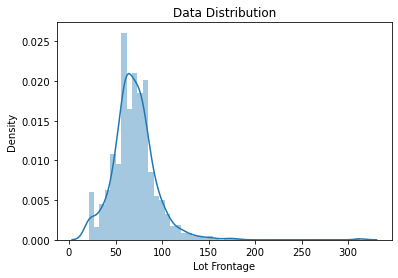

In [13]:
# Let's examine the distribution of the data.

sns.distplot(df_house.LotFrontage)
plt.title('Data Distribution')
plt.xlabel('Lot Frontage')
plt.show()

#### Observation: 

- We can see from the above figure that there are a few outliers, indicating that the data distribution is right-skewed.
- We see that about 17% of the information is missing. Because the data distribution is skewed, we'll replace NA values with the column's median value.

In [14]:
# Imputing LotFrontage with median.

df_house.LotFrontage.replace(np.nan,df_house.LotFrontage.median(),inplace=True)

**GarageYrBlt**

- This column represents the year garage was built.

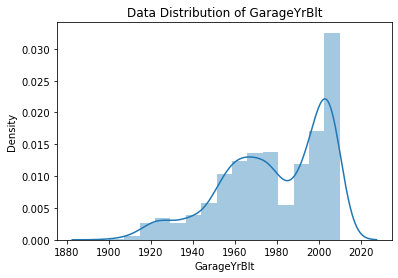

In [15]:
# Let's examine the distribution of data for the "GarageYrBlt" column.

sns.distplot(df_house.GarageYrBlt)
plt.title('Data Distribution of GarageYrBlt')
plt.xlabel('GarageYrBlt')
plt.show()

#### Observation: 

- As previously stated, we have approximately 5% missing values. Dropping these 5% rows would have a direct influence on the other Garage columns. We also have the option of using data imputation. 
However, because the data distribution of this column is not normal, imputation with mean or median (column being numeric) does not appear to be a realistic alternative. 
- It has two distinct peaks, as shown above. Imputation with a any value may result in junk data. As a result, the safest choice is to extract a derived variable from this column.

**Let's extract the following measure from the GarageYrBlt column:**

- 0: NA
- 1: GarageYrBlt<2000 (Old Garage)
- 2: GarageYrBlt>=2000 (New Garage)

In [16]:
# Using the function, obtain the derived metric.

def func_GarageYrBlt(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
    
df_house['GarageYrBlt']=df_house.GarageYrBlt.apply(func_GarageYrBlt)

**MasVnrArea**

- This column represents the masonry veneer area in square feet.

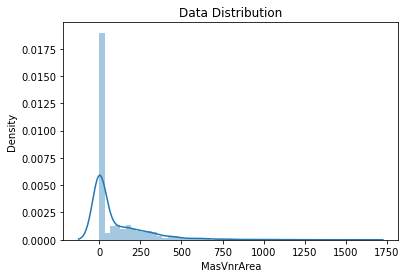

In [17]:
# Let's examine the distribution of data for the "MasVnrArea" column.

sns.distplot(df_house.MasVnrArea)
plt.title('Data Distribution')
plt.xlabel('MasVnrArea')
plt.show()

#### Observation: 

- We can see from the above figure that there are a few outliers, indicating that the data distribution is right-skewed.
- We can replace 'NA' by median value as distribution is skewed.

In [18]:
# Imputing MasVnrArea with median.

df_house.MasVnrArea.replace(np.nan,df_house.MasVnrArea.median(),inplace=True)

**MasVnrType**

- This column represents the masonry veneer type.

In [19]:
# Imputing MasVnrType with None as per data dictionary.

df_house.MasVnrType.replace(np.nan,'None',inplace=True)

**Electrical**

- This column represents the type of Electrical system that the properties have.

In [20]:
# Imputing Electrical column missing value with mode.

df_house.Electrical.replace(np.nan,df_house.Electrical.mode()[0],inplace=True)

In [21]:
# reviewing the null percentage of the dataset's top variables

((df_house.isnull().sum()/len(df_house.index))*100).sort_values(ascending=False).head(10)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
dtype: float64

#### Observation: 

- There are no null values in the dataset.

---
**identifying columns that should be labeled as unordered category types but are instead incorrectly labeled as numeric types.**

In [22]:
# obtaining all of the dataset's float and int variables

df_house.select_dtypes(include=['float64', 'int64']).head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


**MoSold**

- This column represents the month in which the property was sold.

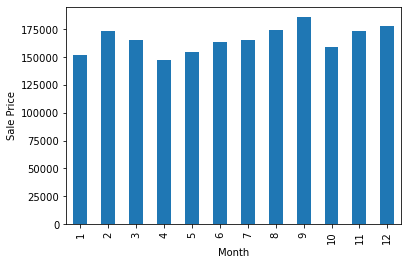

In [23]:
# monitoring the monthly sale price trend

df_house.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

#### Observation: 

- There is no such pattern in monthly sold column thus it is useless in our prediction. Thus, we are dropping this column.

In [24]:
# dropping MoSold column

df_house.drop('MoSold',axis=1,inplace=True)

**YearBuilt, YrSold & YearRemodAdd**

Here,
- YearBuilt column indicates the year of construction of the property
- YrSold indicates the year of selling of that particular property.
- YearRemodAdd is remodel date or same as construction date if no remodeling or additions

Lets get the difference between YrSold and YearBuilt and set its name as house_age.

In [25]:
# YrSold & YearBuilt are used to create the column house age from built.

df_house['house_age']=df_house.YrSold-df_house.YearBuilt

So, now lets use YearRemodAdd and YearBuilt columns to get the flag if house was ever remodel.

In [26]:
# Deriving a column Remodel from YearRemodAdd & YearBuilt

df_house["Remodel"] = df_house.apply(lambda x: 0 if (x['YearRemodAdd'] - x['YearBuilt'] == 0 ) else 1, axis=1)

In [27]:
# Dropping the columns from which we have derived the information

df_house.drop(['YearBuilt','YearRemodAdd','YrSold'], axis=1,inplace=True)

---
**Look for predictors with a large percentage of any single value, as these can have a lot of skewness.**

In [28]:
#Check for categorical columns with more that 90% same values.

skew_columns = []
obj_columns = df_house.select_dtypes(exclude=['int64', 'float64'])
for col in obj_columns:
    if(df_house[col].value_counts(normalize=True).max() >= 0.90):
        print(f'{col} : {round(df_house[col].value_counts(normalize=True).max()*100,2)}%')
        skew_columns.append(col)

Street : 99.59%
Alley : 93.77%
Utilities : 99.93%
LandSlope : 94.66%
Condition2 : 98.97%
RoofMatl : 98.22%
Heating : 97.81%
CentralAir : 93.49%
Electrical : 91.44%
Functional : 93.15%
GarageCond : 90.82%
PavedDrive : 91.78%
PoolQC : 99.52%
MiscFeature : 96.3%


#### Observation: 

- The above list shows the predictors and the corresponding percentage of only singly value. 
- We can drop these predictors since it would not add any value in our model, being highly skewed.

In [29]:
# getting rid of the severely skewed category columns

df_house.drop(skew_columns,axis=1,inplace=True)

In [30]:
# checking the categories of other col where percentage of single value is more than 85. 
# we can group the categories together.

skew_columns = []
obj_columns = df_house.select_dtypes(exclude=['int64', 'float64'])
for col in obj_columns:
    if(df_house[col].value_counts(normalize=True).max() >= 0.85):
        print(f'{col} : {round(df_house[col].value_counts(normalize=True).max()*100,2)}%')
        skew_columns.append(col)

LandContour : 89.79%
Condition1 : 86.3%
ExterCond : 87.81%
BsmtCond : 89.79%
BsmtFinType2 : 86.03%
GarageQual : 89.79%
SaleType : 86.78%


In [31]:
# checking the distribution of different unique values

other_columns = ['LandContour','Condition1','BsmtCond','BsmtFinType2','GarageQual','SaleType','ExterCond']
for i in other_columns:                      
    print("value_counts of variable : %s" %(i))
    print(df_house[i].value_counts(normalize=True)*100)
    print('----------------------------------------------')

value_counts of variable : LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
----------------------------------------------
value_counts of variable : Condition1
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64
----------------------------------------------
value_counts of variable : BsmtCond
TA             89.794521
Gd              4.452055
Fa              3.082192
No Basement     2.534247
Po              0.136986
Name: BsmtCond, dtype: float64
----------------------------------------------
value_counts of variable : BsmtFinType2
Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64
-------------------------

In [32]:
# Grouping the values of columns to a group as others
# we will exclude ExterCond as it has Gd count as approx 10%.

df_house['Condition1'].replace(['Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'others', inplace=True)
df_house['BsmtCond'].replace(['Fa','No Basement','Po'], 'others', inplace=True)
df_house['BsmtFinType2'].replace(['LwQ','No Basement','BLQ','ALQ','GLQ'], 'others', inplace=True)
df_house['SaleType'].replace(['ConLD','ConLI','ConLw','CWD','Oth','Con'], 'others', inplace=True)
df_house['LandContour'].replace(['Bnk','HLS','Low'], 'others', inplace=True)
df_house['GarageQual'].replace(['Fa','Gd','Po','Ex'], 'others', inplace=True)

In [33]:
#Check for numerical columns with more that 90% same values.

skew_columns = []
obj_columns = df_house.select_dtypes(include=['int64', 'float64'])
for col in obj_columns:
    if(df_house[col].value_counts(normalize=True).max() >= 0.90):
        print(f'{col} : {round(df_house[col].value_counts(normalize=True).max()*100,2)}%')
        skew_columns.append(col)

LowQualFinSF : 98.22%
BsmtHalfBath : 94.38%
KitchenAbvGr : 95.34%
3SsnPorch : 98.36%
ScreenPorch : 92.05%
PoolArea : 99.52%
MiscVal : 96.44%


In [34]:
# Dropping the highly skewed numerical columns

df_house.drop(skew_columns, axis=1, inplace=True)

## Outlier treatment
---

In [35]:
# Identifying the numerical variables

numeric_columns=df_house.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice', 'house_age', 'Remodel'],
      dtype='object')

In [36]:
# Checking the percentiles of the numerical variables

df_house[numeric_columns].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,house_age,Remodel
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,0.613014,1.219863,1.767123,472.980137,94.244521,46.660274,21.954110,180921.195890,36.547945,0.476712
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.644666,0.531673,0.747315,213.804841,125.338794,66.256028,61.119149,79442.502883,30.250152,0.499629
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000,8.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,1.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,163000.000000,35.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,1.000000,2.000000,2.000000,576.000000,168.000000,68.000000,0.000000,214000.000000,54.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,1.000000,2.000000,3.000000,757.100000,262.000000,130.000000,112.000000,278000.000000,84.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,2.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,326100.000000,91.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,2.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,442567.010000,110.410000,1.000000


#### Observation: 

- We can see that most of the outliers are between 99 and 100 percentiles, so its identify and treat them.

In [37]:
outlier_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','GarageArea','OpenPorchSF','EnclosedPorch']

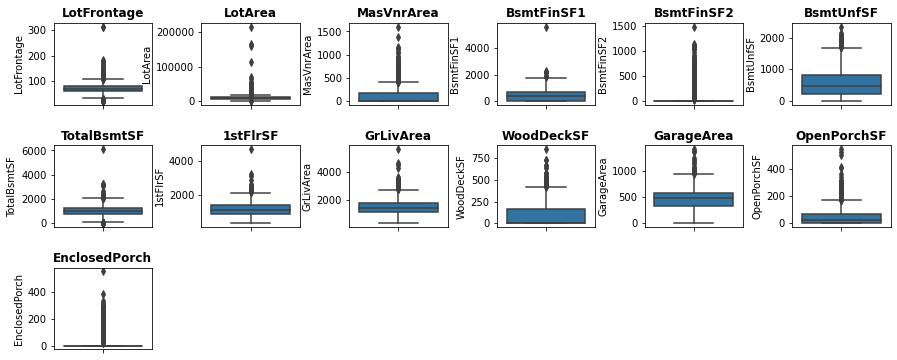

In [38]:
#plotting a box-plot of identified columns

plt.figure(figsize = (15,6))

for i, col in enumerate(outlier_columns):
    plt.subplot(3,6, i+1)
    sns.boxplot(y=col, data=df_house)
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.5, hspace = 0.5)

In [39]:
# Removing the outliers above 99th percentile.

for col in outlier_columns:
    df_house = df_house[df_house[col] < df_house[col].quantile(0.99)]

---
**Let’s check the outliers in our response variable and check whether outlier removal help in making the same more normal.**

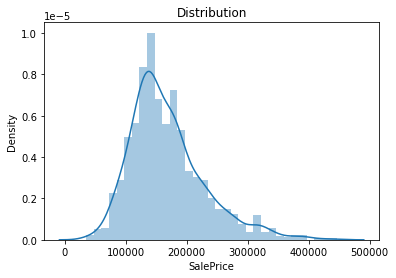

In [40]:
# plotting the distribution of 'SalePrice' target variable

sns.distplot(df_house['SalePrice'])
plt.title('Distribution')
plt.show()

#### Observation: 

- We can observe that our target variable is Right skewed. So, we will apply log transformation to reduce the skewness.

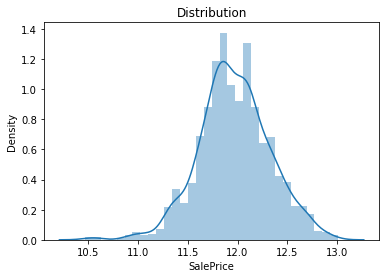

In [41]:
# Performing log transformation to reduce the skewness of the variable
df_house['SalePrice']=np.log(df_house['SalePrice'])

sns.distplot(df_house['SalePrice'])
plt.title('Distribution')
plt.show()

#### Observation: 

- We can see that by applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. 

---

# Data Visualization
---

**Let's look at the correlation between variables and eliminate the independent variables that have a high correlation.**

In [42]:
df_house.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,house_age,Remodel
MSSubClass,1.000000,-0.415836,-0.374168,0.077152,-0.065667,0.036845,-0.055202,-0.051667,-0.142800,-0.244683,...,-0.023061,0.015967,-0.021575,-0.088921,-0.003976,0.020431,-0.025356,-0.047927,-0.058170,-0.052516
LotFrontage,-0.415836,1.000000,0.554746,0.168817,-0.038323,0.168907,0.120278,0.044644,0.119382,0.287256,...,0.209985,0.090057,0.264128,0.300992,0.060113,0.129316,0.007139,0.334864,-0.101721,-0.063952
LotArea,-0.374168,0.554746,1.000000,0.117016,-0.016611,0.086797,0.155856,0.027278,0.054837,0.245800,...,0.254315,0.026967,0.224395,0.266440,0.135966,0.087250,-0.017751,0.329174,-0.056092,-0.028199
OverallQual,0.077152,0.168817,0.117016,1.000000,-0.096200,0.356103,0.166252,-0.113692,0.279922,0.471836,...,0.359475,0.581311,0.578001,0.525299,0.204389,0.343539,-0.126026,0.805148,-0.591360,-0.125912
OverallCond,-0.065667,-0.038323,-0.016611,-0.096200,1.000000,-0.124076,-0.005184,0.060024,-0.150561,-0.160740,...,-0.026134,-0.235991,-0.186423,-0.138615,-0.004493,-0.052814,0.088726,-0.037772,0.371528,0.321338
MasVnrArea,0.036845,0.168907,0.086797,0.356103,-0.124076,1.000000,0.195355,-0.053782,0.078957,0.290451,...,0.235741,0.168602,0.324427,0.318618,0.110950,0.158214,-0.114404,0.374437,-0.288975,-0.170864
BsmtFinSF1,-0.055202,0.120278,0.155856,0.166252,-0.005184,0.195355,1.000000,-0.044695,-0.577469,0.422299,...,0.182912,0.033310,0.184898,0.236189,0.181305,0.054538,-0.111378,0.346691,-0.229974,-0.142424
BsmtFinSF2,-0.051667,0.044644,0.027278,-0.113692,0.060024,-0.053782,-0.044695,1.000000,-0.220978,0.029098,...,-0.010504,-0.117725,-0.050454,-0.014229,0.073287,-0.072403,0.052022,-0.067257,0.077446,-0.057674
BsmtUnfSF,-0.142800,0.119382,0.054837,0.279922,-0.150561,0.078957,-0.577469,-0.220978,1.000000,0.448633,...,0.047629,0.293819,0.189767,0.152638,-0.043610,0.139745,-0.001101,0.190128,-0.145790,0.033699
TotalBsmtSF,-0.244683,0.287256,0.245800,0.471836,-0.160740,0.290451,0.422299,0.029098,0.448633,1.000000,...,0.254739,0.339210,0.408873,0.434728,0.174951,0.198739,-0.107340,0.583089,-0.398645,-0.138117


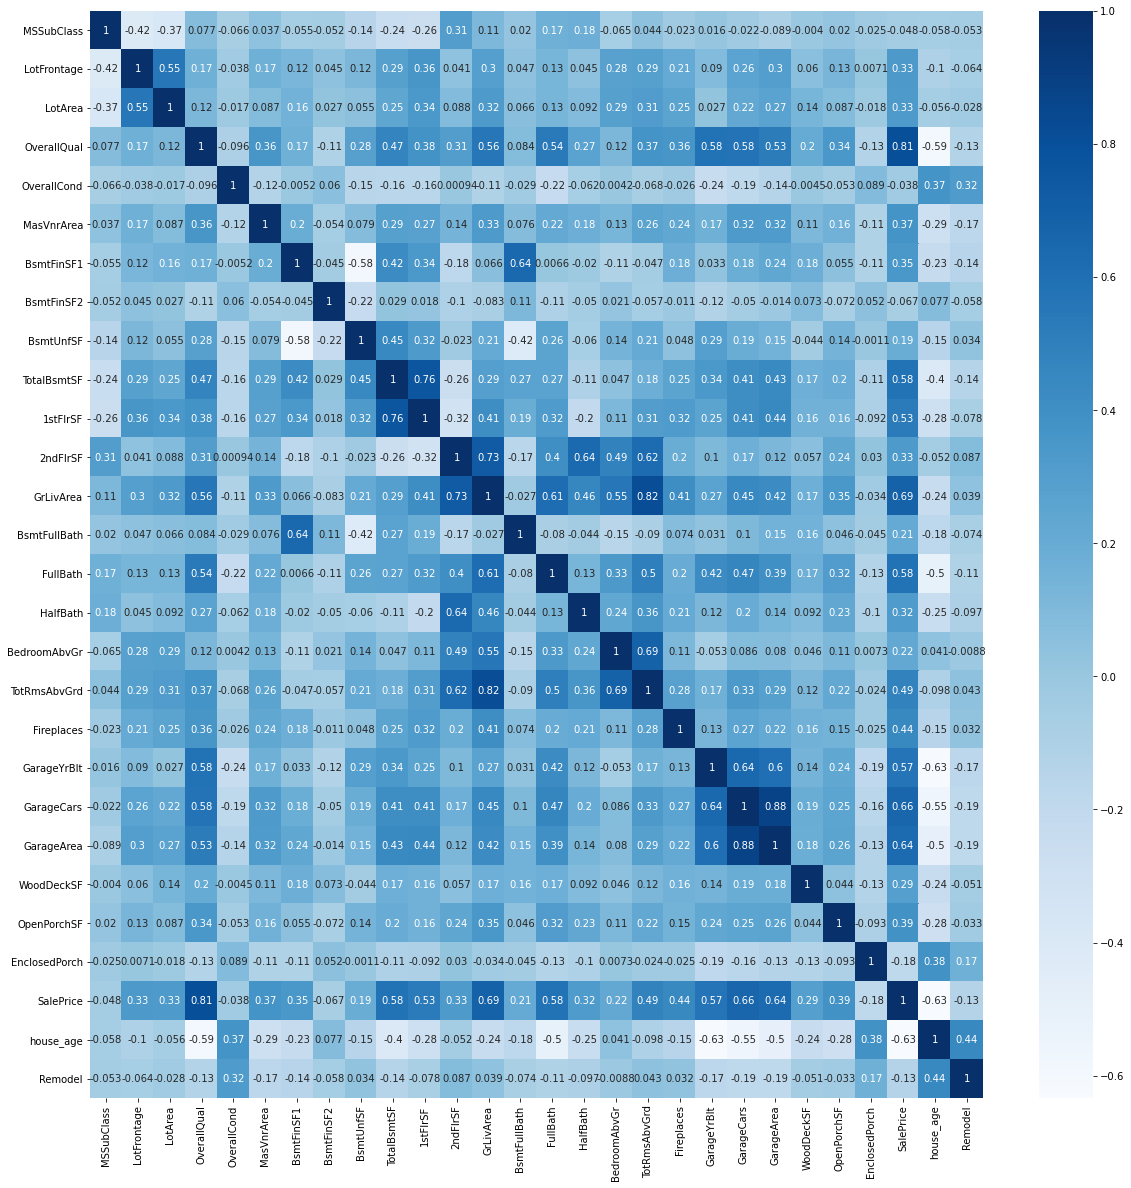

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df_house.corr(),cmap="Blues", annot=True)
plt.show()

#### Observation: 

- We can see below highly correlated independent variables -

    TotRmsAbvGrd & GrLivArea have 82% correlation.

    GarageCars & GarageArea have 88% correlation.

    So, we have to remove any one of the two highly correlated variables.
    

- The target variable, SalePrice is highly correlated with OverallQual, GrLivArea and GarageCars.

In [44]:
#Dropping TotRmsAbvGrd and GarageArea because of high correlation.

df_house.drop(['TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

**Let’s checkout the scatter plot to see the relationship between numerical variables and the target variable.**

In [45]:
num_columns=list(df_house.select_dtypes(['int64','float64']))

# excluding some columns which are target and categorical

num_columns.remove('SalePrice') # target variable
num_columns.remove('OverallCond') # ordinal categorical variable
num_columns.remove('OverallQual') # ordinal categorical variable
num_columns.remove('MSSubClass')  # categorical variable 
num_columns.remove('Remodel')

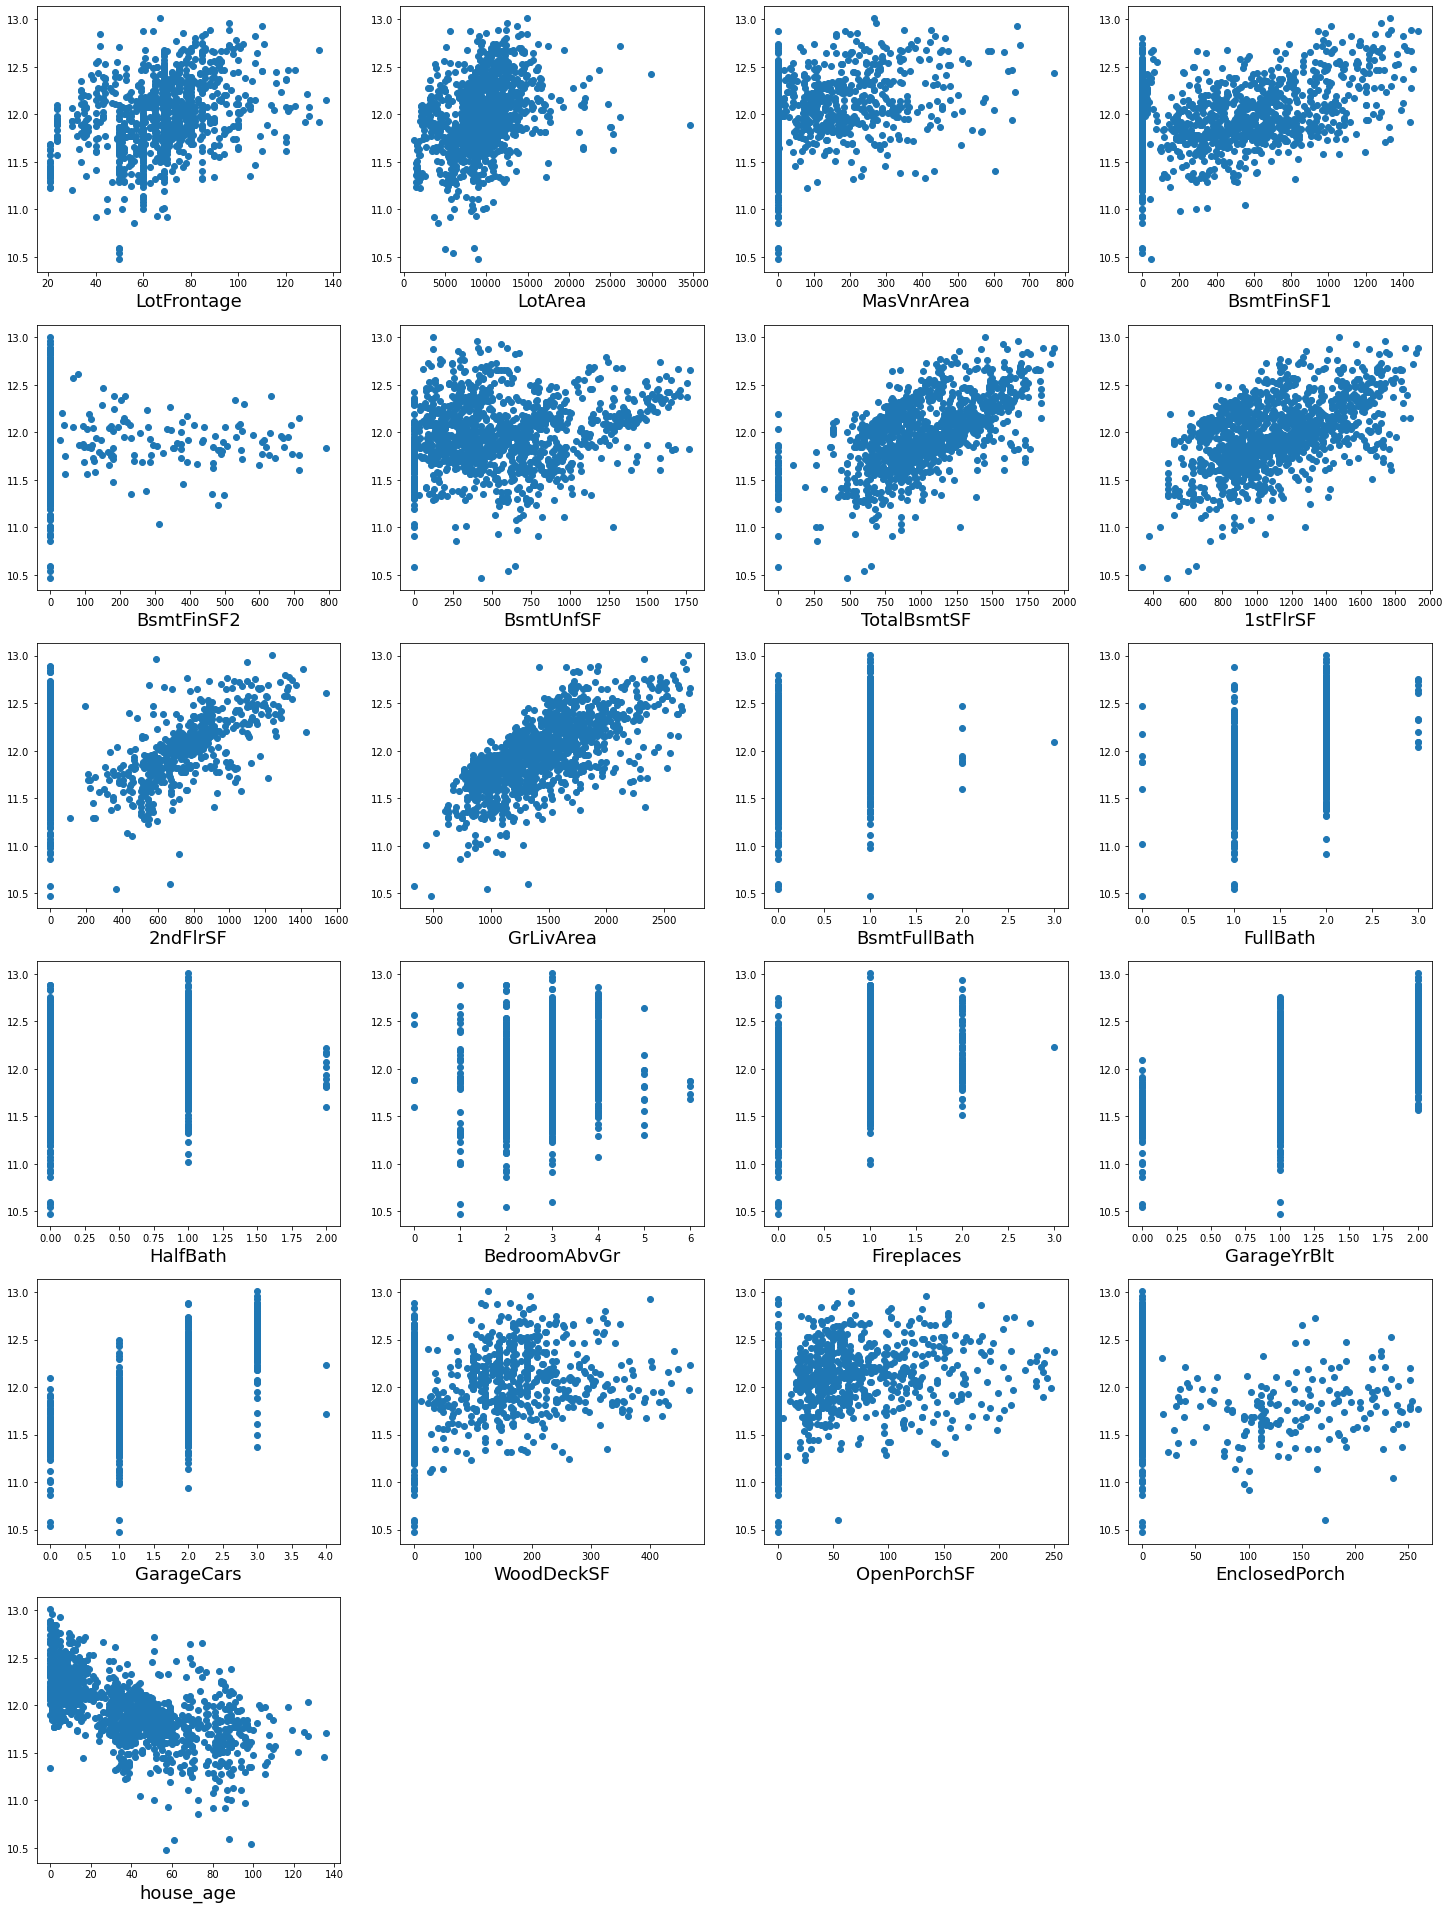

In [46]:
#scatter plot for all numeric data with target variable

plt.figure(figsize=(25,40))
for m,n in enumerate(num_columns):
    plt.subplot(7,4,(m+1))
    plt.scatter(df_house[n],df_house['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

#### Observation: 

- Many variables appear to have a strong positive and negative relationship with the target variable.
- The majority of variable, such as TotalBsmtSF, GrLivArea, and 1stFlrSF, are proportional to SalePrice. 
- house_age is inversely proportional to SalePrice. 

**Let’s checkout the distribution of target variable based on different categories of categorical columns.**

In [47]:
cat_columns=list(df_house.select_dtypes('object'))

# excluding some columns which have lot of categories
cat_columns.remove('Neighborhood') 
cat_columns.remove('Exterior1st')
cat_columns.remove('Exterior2nd')

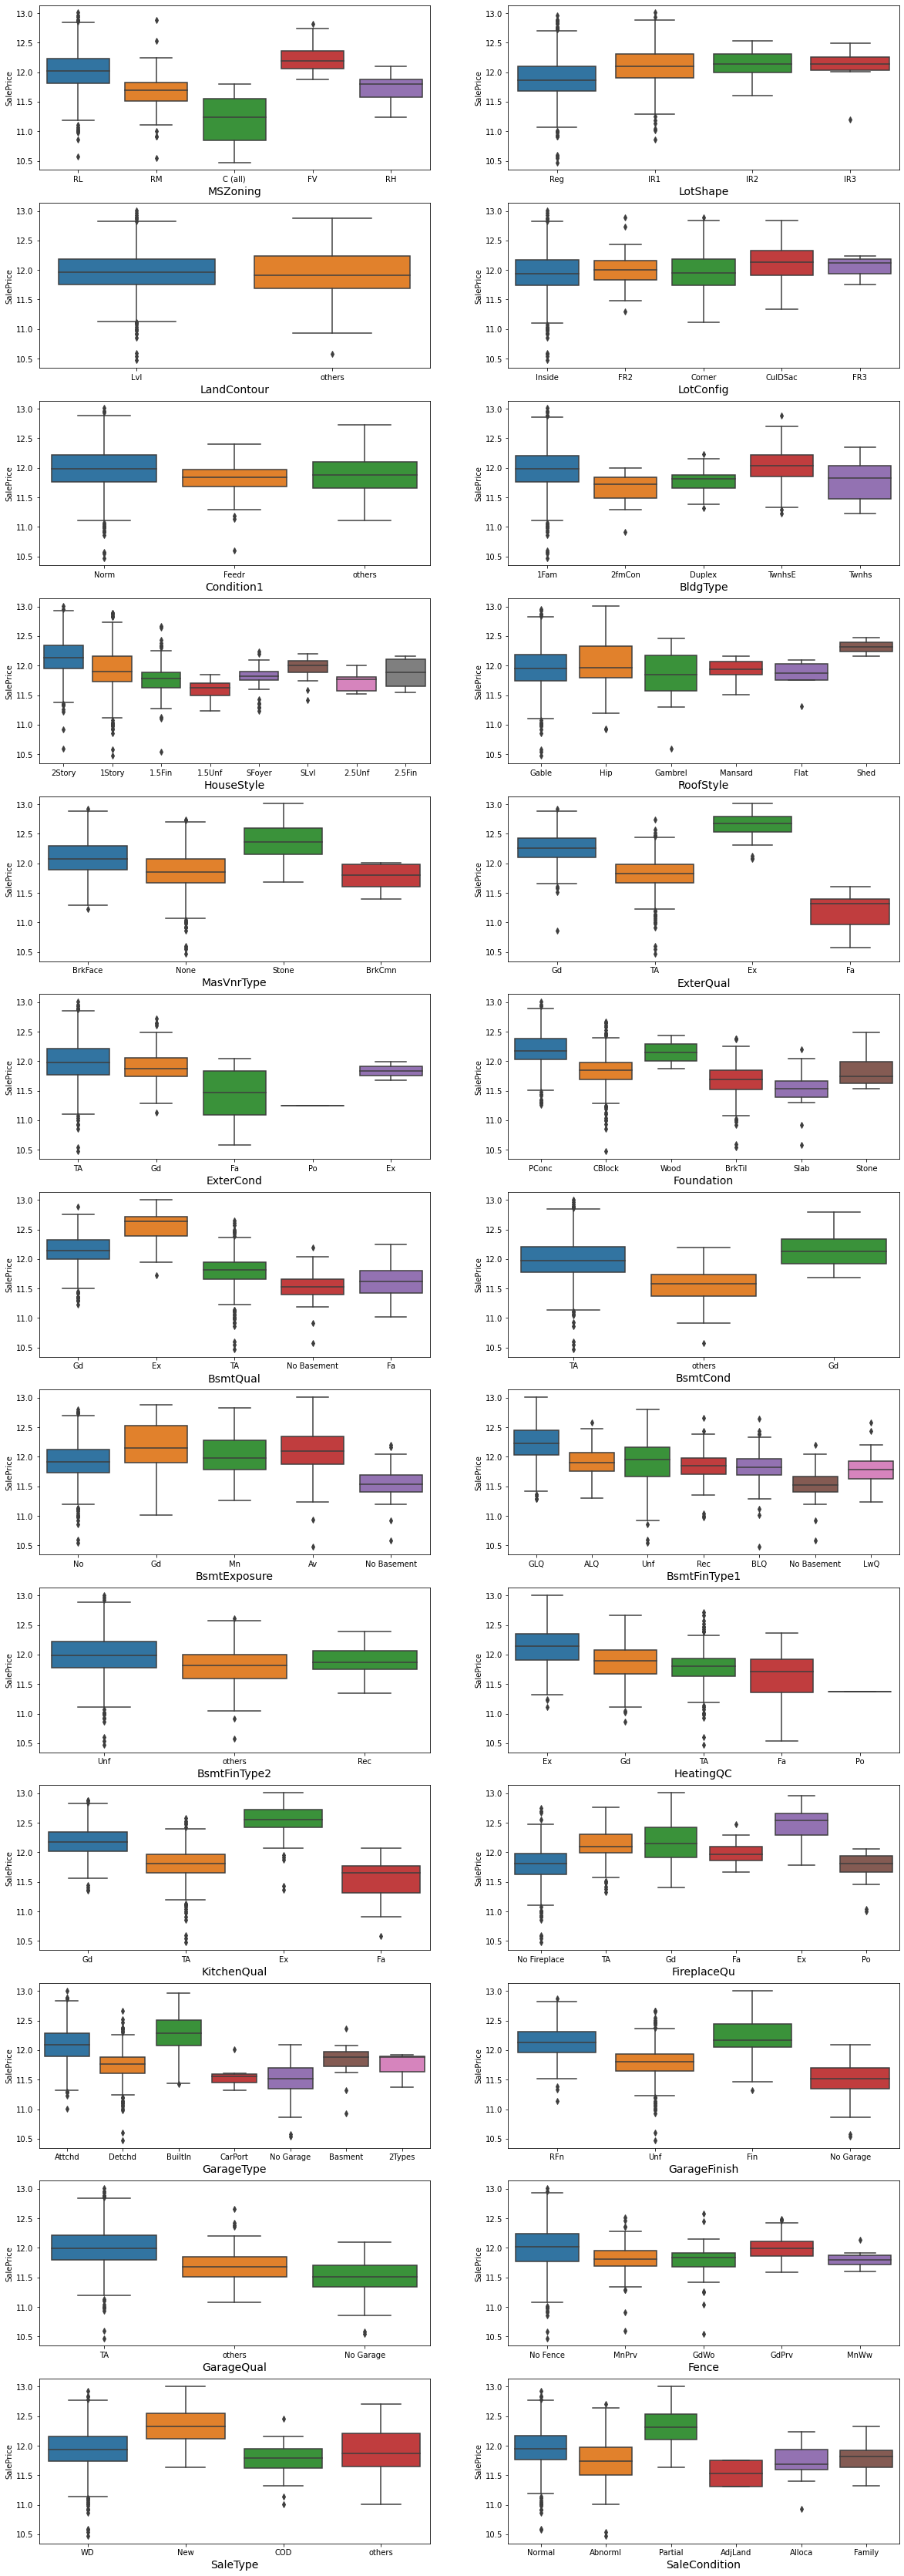

In [48]:
# Comparing the 'SalePrice' with various categorical columns

plt.figure(figsize=(20,70))
for m,n in enumerate(cat_columns):
    plt.subplot(15,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df_house)
    plt.xlabel(n, fontsize=14)
plt.show()

#### Observation: 

- External material, basement, kitchen, and heating of good quality are more likely to earn a higher SalePrice.
- The average SalePrice for partial sale conditions is greater than for other categories.
- Garages with full or rough finished interiors are more likely to sell for more money.
- The average SalePrice of masonry veneer coated with stone is greater.

---

# Data Preparation
---

We have three types of predictor variables: ordered categorical, unordered categorical, and numeric. 

Converting ordered categorical variables to numeric types is preferable than converting them to dummies.

In [49]:
# checking for the 'object' type columns

df_house.select_dtypes('object').columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
# Encoding ordered categorical variables

df_house['LotShape'] = df_house['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df_house['ExterQual'] = df_house['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_house['BsmtExposure']=df_house['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
df_house['BsmtQual']=df_house['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})
df_house['BsmtFinType1']=df_house['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})
df_house['HeatingQC']=df_house['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_house['GarageFinish']=df_house['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
df_house['FireplaceQu']=df_house['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
df_house['KitchenQual']=df_house['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_house['Fence'] = df_house['Fence'].map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "No Fence": 0})
df_house['BsmtFinType2'] = df_house['BsmtFinType2'].map({'Unf':2 , 'Rec': 1, 'others': 0 })
df_house['BsmtCond'] = df_house['BsmtCond'].map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, 'others':0 })
df_house['ExterCond'] = df_house['ExterCond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
df_house['GarageQual']=df_house['GarageQual'].map({'Ex': 5 ,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1 ,'No Garage':0,'others':0 })

## Creating Dummy Variable
---

In [51]:
# Changing the datatype of MSSubClass into categorical from int64

df_house["MSSubClass"]=df_house["MSSubClass"].astype("object")

In [52]:
# Getting list of unordered columns

dummy_col_list=df_house.select_dtypes('object').columns
dummy_col_list

Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [53]:
# creating dummy variable in df_house data frame and dropping first column

df_dummy = pd.get_dummies(df_house[dummy_col_list], drop_first=True)

# concat dummy dataframe to df_house data frame
df_house = pd.concat([df_house, df_dummy], axis=1)

# Dropping actual columns from df_house data frame
df_house = df_house.drop(columns=dummy_col_list)

df_house.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleType_WD,SaleType_others,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2,7,5,162.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0
5,84.0,14260,2,8,5,350.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0
6,85.0,14115,2,5,5,0.0,2,2,4,3,...,0,0,0,1,0,0,0,0,1,0


In [54]:
df_house.shape

(1275, 154)

#### Observation: 

- We have 154 columns and 1275 rows after the dummy variable creation in the dataframe.

### Splitting the data to Train and Test
---

In [55]:
# Splitting the target and predictors from the dataset

y = df_house['SalePrice']
X = df_house.drop(['SalePrice'], axis=1)

print('df_house.shape :',df_house.shape)
print('X.shape :',X.shape)
print('y.shape :',y.shape)

df_house.shape : (1275, 154)
X.shape : (1275, 153)
y.shape : (1275,)


In [56]:
# Splitting data in train & test with random state 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print('X_train.shape :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape :',X_test.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (892, 153)
y_train.shape : (892,)
X_test.shape : (383, 153)
y_test.shape : (383,)


### Scaling the variables
---

In [57]:
# Checking the values before scaling

cols=X_train.select_dtypes(exclude=['uint8']).columns
X_train[cols].head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,house_age,Remodel
Id,,,,,,,,,,,,,,,,,,,,,
360,78.0,12011,2,8,5,530.0,3,2,4,3,...,1,2,2,3,208,75,0,0,8,0
1167,64.0,10475,2,8,5,72.0,3,2,4,3,...,2,2,3,3,160,33,0,0,2,0
365,69.0,18800,2,6,5,120.0,2,2,4,3,...,1,3,2,3,306,111,0,0,30,0
1177,37.0,6951,2,5,5,0.0,2,2,3,3,...,1,1,1,3,362,0,0,3,24,1
1095,74.0,5868,3,5,7,0.0,2,2,3,3,...,1,3,1,3,0,0,80,0,54,1


In [58]:
# Initialising the StandardScaler Scaler
scaler = StandardScaler()

# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [59]:
# Checking the values after scaling

X_train[cols].head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,house_age,Remodel
Id,,,,,,,,,,,,,,,,,,,,,
360,0.574504,0.723277,-1.165384,1.642154,-0.533426,3.298628,1.244860,-0.214359,0.676217,0.200088,...,-0.377700,0.411744,0.444684,0.328747,1.124557,0.638959,-0.375038,-0.496871,-1.040793,-0.936960
1167,-0.206767,0.308297,-1.165384,1.642154,-0.533426,-0.078168,1.244860,-0.214359,0.676217,0.200088,...,1.547492,0.411744,1.851275,0.328747,0.690446,-0.129096,-0.375038,-0.496871,-1.248594,-0.936960
365,0.072259,2.557456,-1.165384,0.090458,-0.533426,0.275732,-0.621384,-0.214359,0.676217,0.200088,...,-0.377700,1.563078,0.444684,0.328747,2.010868,1.297292,-0.375038,-0.496871,-0.278854,-0.936960
1177,-1.713503,-0.643779,-1.165384,-0.685391,-0.533426,-0.609018,-0.621384,-0.214359,-0.426499,0.200088,...,-0.377700,-0.739590,-0.961906,0.328747,2.517332,-0.732567,-0.375038,1.916245,-0.486656,1.067281
1095,0.351284,-0.936373,0.664761,-0.685391,1.258726,-0.609018,-0.621384,-0.214359,-0.426499,0.200088,...,-0.377700,1.563078,-0.961906,0.328747,-0.756593,-0.732567,1.030936,-0.496871,0.552351,1.067281


---

# Model building and evaluation
---

### Recursive feature elimination (RFE)
---

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.

In [60]:
# Executing RFE with the output number of the variable as 100.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Creating X_train dataframe with RFE selected variables i.e. support_ as True.

col = X_train.columns[rfe.support_]

X_train = X_train[col]

# getting values of X_train

X_train.head()

,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,...,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
360,0.723277,1.642154,-0.533426,0.676217,1.410191,-0.292354,-0.970738,0.305805,0.951745,1.172358,...,0,0,1,0,0,0,0,0,0,1
1167,0.308297,1.642154,-0.533426,0.676217,-1.043528,-0.292354,2.797169,1.991346,0.951745,0.635626,...,0,0,1,0,0,0,0,0,0,1
365,2.557456,0.090458,-0.533426,0.676217,0.783928,-0.292354,-1.081559,-0.498154,-1.118881,0.355592,...,0,0,1,0,0,0,0,0,0,1
1177,-0.643779,-0.685391,-0.533426,-0.426499,0.645329,-0.292354,-0.758733,-0.276373,-1.118881,-1.163594,...,0,0,1,0,0,0,0,0,0,1
1095,-0.936373,-0.685391,1.258726,-0.426499,-0.406998,1.646889,-0.204629,-0.110036,0.951745,-1.133257,...,0,0,1,0,0,0,0,0,0,1


In [62]:
# Creating X_test dataframe with RFE selected variables i.e. support_ as True.

X_test = X_test[col]

# getting values of X_test

X_test.head()

,LotArea,OverallQual,OverallCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,...,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
1348,1.613484,1.642154,-0.533426,1.778932,-0.838196,-0.292354,2.695985,2.096693,0.951745,0.826982,...,0,0,1,0,0,0,1,0,0,0
389,0.013002,0.866306,-0.533426,0.676217,-1.043528,-0.292354,2.252702,1.364813,0.951745,0.133898,...,0,0,1,0,0,0,0,0,0,1
733,0.559284,0.866306,-0.533426,0.676217,-0.396732,-0.292354,0.886715,0.491547,0.951745,1.422055,...,0,0,1,0,0,0,0,0,0,1
877,4.309773,-1.461239,-0.533426,-0.426499,0.581162,-0.292354,-0.245585,0.244815,-0.083568,-0.890560,...,0,0,1,0,0,0,0,0,0,1
912,-0.012934,-0.685391,1.258726,0.676217,-0.540464,-0.292354,1.298679,0.810358,-1.118881,-0.358495,...,0,0,0,0,1,0,0,0,0,1


In [63]:
lm=LinearRegression()

lm.fit(X_train,y_train)


y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)

def scores_(y,x):
    print('Mean Absolute Error (MAE) :', mean_absolute_error(y, x))
    print('Mean Squared Error (MSE):', mean_squared_error(y, x))
    print('Root Mean Square Error (RMSE) :', np.sqrt(mean_squared_error(y, x)))
    print('R2 Score:' ,r2_score(y,x))
    
print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('**************************************')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.06803799129129141
Mean Squared Error (MSE): 0.008847461496423742
Root Mean Square Error (RMSE) : 0.09406094564921055
R2 Score: 0.9309142528355241
**************************************
Test Accuracy
------------------
Mean Absolute Error (MAE) : 512254328.0058733
Mean Squared Error (MSE): 1.0050092215045405e+20
Root Mean Square Error (RMSE) : 10025014820.46057
R2 Score: -8.05250716537189e+20


#### Observation: 

- From above, we can clearly see that our model with 100 independent features is highly overfitting. 

So lets use VIF to drop some highly correlated features and proceed with regularization.

In [64]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

def get_VIF(X_train):
    vif = pd.DataFrame()
    vif['Variables'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif = vif.reset_index(drop=True)
    return vif

get_VIF(X_train).head(15)

,Variables,VIF
0,MSSubClass_90,inf
1,Exterior2nd_CBlock,inf
2,BldgType_Duplex,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,Exterior1st_CBlock,inf
8,Exterior1st_CemntBd,inf
9,Exterior2nd_CmentBd,inf


In [65]:
X_train=X_train.drop('MSSubClass_90',axis=1)
X_test=X_test.drop('MSSubClass_90',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,Exterior1st_CBlock,inf
1,BsmtFinSF1,inf
2,BsmtFinSF2,inf
3,BsmtUnfSF,inf
4,TotalBsmtSF,inf
5,Exterior1st_CemntBd,inf
6,Exterior2nd_CBlock,inf
7,Exterior2nd_CmentBd,inf
8,RoofStyle_Gable,125.31
9,MSZoning_RL,112.41


The variable "MSSubClass_90" has a significantly high VIF. So, it should be dropped.

In [66]:
X_train=X_train.drop('Exterior1st_CBlock',axis=1)
X_test=X_test.drop('Exterior1st_CBlock',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,Exterior1st_CemntBd,inf
1,TotalBsmtSF,inf
2,Exterior2nd_CmentBd,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,RoofStyle_Gable,125.31
7,MSZoning_RL,112.41
8,Exterior1st_VinylSd,39.53
9,Exterior2nd_VinylSd,36.76


The variable "Exterior1st_CBlock" has a significantly high VIF. So, it should be dropped.

In [67]:
X_train=X_train.drop('Exterior1st_CemntBd',axis=1)
X_test=X_test.drop('Exterior1st_CemntBd',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,BsmtFinSF1,inf
1,BsmtFinSF2,inf
2,BsmtUnfSF,inf
3,TotalBsmtSF,inf
4,RoofStyle_Gable,125.31
5,MSZoning_RL,112.41
6,Exterior1st_VinylSd,39.53
7,Exterior2nd_VinylSd,36.76
8,RoofStyle_Hip,29.15
9,Exterior2nd_MetalSd,27.71


The variable "Exterior1st_CemntBd" has a significantly high VIF. So, it should be dropped.

In [68]:
X_train=X_train.drop('BsmtFinSF1',axis=1)
X_test=X_test.drop('BsmtFinSF1',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,RoofStyle_Gable,125.31
1,MSZoning_RL,112.41
2,Exterior1st_VinylSd,39.53
3,Exterior2nd_VinylSd,36.76
4,RoofStyle_Hip,29.15
5,Exterior2nd_MetalSd,27.71
6,Exterior1st_MetalSd,27.29
7,MSZoning_RM,24.84
8,Condition1_Norm,18.18
9,HouseStyle_1Story,16.10


The variable "BsmtFinSF1" has a significantly high VIF. So, it should be dropped.

In [69]:
X_train=X_train.drop('RoofStyle_Gable',axis=1)
X_test=X_test.drop('RoofStyle_Gable',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,MSZoning_RL,59.04
1,Exterior1st_VinylSd,39.50
2,Exterior2nd_VinylSd,36.63
3,Exterior2nd_MetalSd,27.69
4,Exterior1st_MetalSd,27.29
5,Condition1_Norm,17.43
6,HouseStyle_1Story,15.64
7,MSZoning_RM,13.77
8,SaleCondition_Normal,13.05
9,GarageType_Attchd,11.35


The variable "RoofStyle_Gable" has a significantly high VIF. So, it should be dropped.

In [70]:
X_train=X_train.drop('MSZoning_RL',axis=1)
X_test=X_test.drop('MSZoning_RL',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,Exterior1st_VinylSd,39.28
1,Exterior2nd_VinylSd,36.63
2,Exterior2nd_MetalSd,27.63
3,Exterior1st_MetalSd,27.29
4,Condition1_Norm,13.99
5,HouseStyle_1Story,13.10
6,SaleCondition_Normal,11.56
7,Foundation_PConc,10.17
8,house_age,9.91
9,GarageType_Attchd,9.40


The variable "MSZoning_RL" has a significantly high VIF. So, it should be dropped.

In [71]:
X_train=X_train.drop('Exterior1st_VinylSd',axis=1)
X_test=X_test.drop('Exterior1st_VinylSd',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,Exterior2nd_MetalSd,27.61
1,Exterior1st_MetalSd,27.26
2,Condition1_Norm,13.85
3,HouseStyle_1Story,13.06
4,SaleCondition_Normal,11.54
5,Foundation_PConc,10.07
6,house_age,9.87
7,GarageType_Attchd,9.40
8,Foundation_CBlock,8.55
9,HouseStyle_SLvl,8.40


The variable "Exterior1st_VinylSd" has a significantly high VIF. So, it should be dropped.

In [72]:
X_train=X_train.drop('Exterior2nd_MetalSd',axis=1)
X_test=X_test.drop('Exterior2nd_MetalSd',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,Condition1_Norm,13.85
1,HouseStyle_1Story,13.06
2,SaleCondition_Normal,11.54
3,Foundation_PConc,10.07
4,house_age,9.86
5,GarageType_Attchd,9.39
6,Foundation_CBlock,8.54
7,HouseStyle_SLvl,8.40
8,MSSubClass_80,7.87
9,Exterior1st_Wd Sdng,7.38


The variable "Exterior2nd_MetalSd" has a significantly high VIF. So, it should be dropped.

In [73]:
X_train=X_train.drop('Condition1_Norm',axis=1)
X_test=X_test.drop('Condition1_Norm',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,HouseStyle_1Story,12.50
1,SaleCondition_Normal,10.93
2,house_age,9.86
3,Foundation_PConc,9.51
4,GarageType_Attchd,8.83
5,HouseStyle_SLvl,8.31
6,Foundation_CBlock,8.08
7,MSSubClass_80,7.87
8,Exterior1st_Wd Sdng,7.38
9,HouseStyle_1.5Unf,7.32


The variable "Condition1_Norm" has a significantly high VIF. So, it should be dropped.

In [74]:
X_train=X_train.drop('HouseStyle_1Story',axis=1)
X_test=X_test.drop('HouseStyle_1Story',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,SaleCondition_Normal,10.52
1,house_age,9.72
2,Foundation_PConc,8.91
3,GarageType_Attchd,8.47
4,HouseStyle_SLvl,8.13
5,MSSubClass_80,7.80
6,Foundation_CBlock,7.47
7,Exterior1st_Wd Sdng,7.37
8,HouseStyle_1.5Unf,7.18
9,MSSubClass_45,7.01


The variable "HouseStyle_1Story" has a significantly high VIF. So, it should be dropped.

In [75]:
X_train=X_train.drop('SaleCondition_Normal',axis=1)
X_test=X_test.drop('SaleCondition_Normal',axis=1)

get_VIF(X_train).head(15)

,Variables,VIF
0,house_age,9.68
1,HouseStyle_SLvl,8.13
2,Foundation_PConc,7.94
3,MSSubClass_80,7.80
4,Exterior1st_Wd Sdng,7.37
5,GarageType_Attchd,7.32
6,HouseStyle_1.5Unf,7.17
7,MSSubClass_45,7.01
8,Foundation_CBlock,6.60
9,Exterior2nd_Wd Sdng,6.56


The variable "SaleCondition_Normal" has a significantly high VIF. So, it should be dropped.

**As we are considering that VIF should be less than 10, all variables are under our assumed range, let's proceed with regularization.**

In [76]:
#checking the column left in test and train dataset

print("X_train.shape - ",X_train.shape)
print("X_test.shape - ",X_test.shape)

X_train.shape -  (892, 89)
X_test.shape -  (383, 89)


#### Observation: 

- The 89 key characteristics are now remaining after some feature elimination using RFE & VIF.
With varying values of Alpha, we will use the Ridge and Lasso regularization techniques on these columns (hyperparameter).


Additionally, we will compare the model performance in two ways and select the optimal alpha.

## Ridge Regression
---
We'll first use the Grid Search Cross Validation method to get the ideal value of the hyperparameter alpha for the ridge regression model.

In [77]:
# Applying Ridge Regression

# List of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

# Performing Grid Search
folds=KFold(n_splits=5,shuffle=True,random_state=42)

ridge_model_cv = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)

# fitting the model
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Getting the results of Grid Search in a dataframe

cv_results= pd.DataFrame(ridge_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
18,7,-0.070246,-0.076018,1
19,8,-0.070407,-0.076020,2
17,6,-0.070078,-0.076047,3
20,9,-0.070564,-0.076054,4
16,5,-0.069900,-0.076093,5
21,10,-0.070721,-0.076103,6
15,4,-0.069709,-0.076149,7
14,3,-0.069491,-0.076255,8
13,2,-0.069251,-0.076431,9
22,20,-0.072106,-0.076738,10


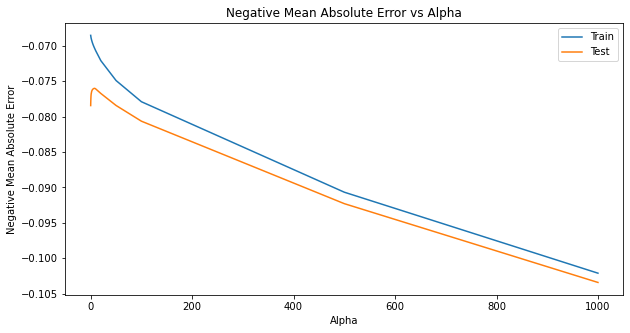

In [79]:
# Negative Mean Absolute Error vs alpha value plot

plt.figure(figsize=(10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend()
plt.show()

In [80]:
# Getting the optimal value of alpha

ridge_model_cv.best_estimator_

Ridge(alpha=7.0)

**Creating the model with the optimal alpha value**

In [81]:
# Building the model using optimal value of alpha

alpha=7.0

ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('**************************************')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.07053843470270457
Mean Squared Error (MSE): 0.010403350900034844
Root Mean Square Error (RMSE) : 0.10199681808779548
R2 Score: 0.9187650299203171
**************************************
Test Accuracy
------------------
Mean Absolute Error (MAE) : 0.08129134413920548
Mean Squared Error (MSE): 0.013950550575085856
Root Mean Square Error (RMSE) : 0.11811244885737429
R2 Score: 0.8882230072490391


#### Observation: 

- We can choose the optimal value of alpha as 7.0. 
- R2 score for train and test data with Ridge regularisation (alpha=7.0) are signifying that the model is good.

**Let’s check out the top 10 variables with their coefficient values.**

In [82]:
# Finding the top 10 variables according to ridge

ridge_df = pd.DataFrame({'Variables':X_train.columns, 'Co-efficient':ridge.coef_.round(4)})
ridge_df = ridge_df.sort_values(by='Co-efficient', ascending=False).reset_index(drop=True)

ridge_df.head(10)

,Variables,Co-efficient
0,Neighborhood_Crawfor,0.1187
1,GrLivArea,0.1017
2,OverallQual,0.0773
3,TotalBsmtSF,0.0688
4,Foundation_PConc,0.0542
5,OverallCond,0.0511
6,Neighborhood_BrkSide,0.0446
7,SaleType_New,0.0409
8,Neighborhood_Somerst,0.0366
9,Exterior2nd_Wd Sdng,0.0366


**Subjective Question 1**

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?What will be the most important predictor variables after the change is implemented?


**Let's check the Ridge Regression after doubling the alpha value**

In [83]:
# Building the model using double optimal value of alpha

ridge = Ridge(alpha=14.0)
ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('____________________________')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.07139257655653909
Mean Squared Error (MSE): 0.010666198194727304
Root Mean Square Error (RMSE) : 0.10327728789393777
R2 Score: 0.9167125765978211
____________________________
Test Accuracy
------------------
Mean Absolute Error (MAE) : 0.08221124118070221
Mean Squared Error (MSE): 0.014116669325063922
Root Mean Square Error (RMSE) : 0.11881359065807212
R2 Score: 0.886892002124033


In [84]:
# Finding the top 10 variables according to ridge

ridge_df_double = pd.DataFrame({'Variables':X_train.columns, 'Co-efficient':ridge.coef_.round(4)})
ridge_df_double = ridge_df_double.sort_values(by='Co-efficient', ascending=False).reset_index(drop=True)

ridge_df_double.head(10)

,Variables,Co-efficient
0,GrLivArea,0.0997
1,Neighborhood_Crawfor,0.0960
2,OverallQual,0.0780
3,TotalBsmtSF,0.0690
4,OverallCond,0.0510
5,Foundation_PConc,0.0449
6,SaleType_New,0.0375
7,Neighborhood_BrkSide,0.0368
8,LotArea,0.0319
9,Neighborhood_Somerst,0.0291


## Lasso Regression
---

Use GridSearchCV method to get the best value of hyperparameter for lasso regression.

In [85]:
# Using Lasso Regression

lasso = Lasso()

# List of alphas
params = {'alpha': [0.0002,0.0003,0.0004,0.0005,0.001,0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5]}


folds  = KFold(n_splits=5,shuffle=True,random_state=100)

# Preforming Grid Search
lasso_model_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)            

# fitting the model
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Getting the results of Grid Search in a dataframe

cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0004,-0.071277,-0.077243,1
3,0.0005,-0.071734,-0.077248,2
1,0.0003,-0.070760,-0.077267,3
0,0.0002,-0.070122,-0.077387,4
4,0.001,-0.073499,-0.077599,5
5,0.01,-0.082588,-0.085169,6
6,0.05,-0.108619,-0.110359,7
7,0.1,-0.144082,-0.145893,8
8,0.2,-0.219004,-0.220161,9
9,0.3,-0.278406,-0.278594,10


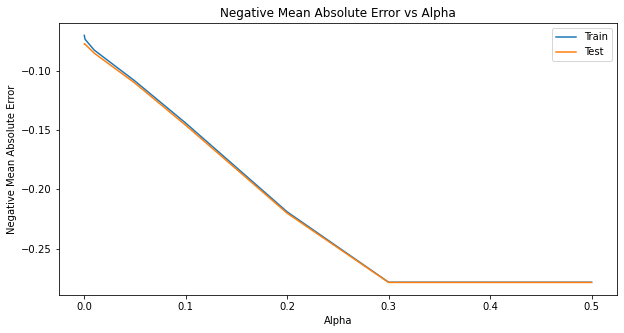

In [87]:
#plotting Negative Mean Absolute Error vs alpha value
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend()
plt.show()

In [88]:
# Optimal value of alpha

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

**Creating the model with the optimal alpha value**

In [89]:
# Building the model using optimal alpha value

alpha =0.0004
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('_________________________________')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.0717237076149197
Mean Squared Error (MSE): 0.01061410896718478
Root Mean Square Error (RMSE) : 0.10302479782646885
R2 Score: 0.9171193173567891
_________________________________
Test Accuracy
------------------
Mean Absolute Error (MAE) : 0.08244513458562892
Mean Squared Error (MSE): 0.014219095165105413
Root Mean Square Error (RMSE) : 0.11924384749371941
R2 Score: 0.8860713282503957


In [90]:
#get dictionary containing all the variables and coefficients

lasso_dict=dict(zip(X_train.columns,lasso.coef_))

In [91]:
# Finding the top 10 significant variables according to lasso regressor

lasso_df = pd.DataFrame({'Variables':X_train.columns, 'Co-efficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Co-efficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Co-efficient', ascending=False).reset_index(drop=True)
temp_lasso_df = lasso_df.head(10)
lasso_df.head(10)

,Variables,Co-efficient
0,Neighborhood_Crawfor,0.1468
1,GrLivArea,0.1045
2,OverallQual,0.0810
3,TotalBsmtSF,0.0702
4,OverallCond,0.0506
5,Foundation_PConc,0.0485
6,Neighborhood_BrkSide,0.0456
7,Neighborhood_Somerst,0.0405
8,SaleType_New,0.0400
9,Neighborhood_NridgHt,0.0337


**Subjective Question 1**

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?What will be the most important predictor variables after the change is implemented?


**Let's check the Lasso Regression after doubling the alpha value**

In [92]:
# Building the model using double optimal value of alpha

lasso = Lasso(alpha=0.0008)
lasso.fit(X_train, y_train)

y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('**************************************')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.07325700277957048
Mean Squared Error (MSE): 0.011090749517826211
Root Mean Square Error (RMSE) : 0.10531262753262882
R2 Score: 0.9133974510809922
**************************************
Test Accuracy
------------------
Mean Absolute Error (MAE) : 0.08357105803521814
Mean Squared Error (MSE): 0.014440790284577452
Root Mean Square Error (RMSE) : 0.12016983932991444
R2 Score: 0.8842950246107096


In [93]:
# Finding the top 10 significant variables according to lasso regressor

lasso_df_double = pd.DataFrame({'Variables':X_train.columns, 'Co-efficient':lasso.coef_.round(4)})
lasso_df_double = lasso_df_double[lasso_df_double['Co-efficient'] != 0.00]
lasso_df_double = lasso_df_double.sort_values(by='Co-efficient', ascending=False).reset_index(drop=True)
lasso_df_double.head(10)

,Variables,Co-efficient
0,Neighborhood_Crawfor,0.1291
1,GrLivArea,0.1058
2,OverallQual,0.0839
3,TotalBsmtSF,0.0734
4,OverallCond,0.0512
5,SaleType_New,0.0351
6,Neighborhood_BrkSide,0.0348
7,Foundation_PConc,0.0316
8,Neighborhood_Somerst,0.0313
9,LotArea,0.0294


#### Observation: 

- We can choose the optimal value of alpha as 0.0004. 
- R2 score for train and test data with lasso regularisation (alpha=0.0005) are signifying that the model is good.

### Conclusion
---



**Ridge Regression**

- Optimal alpha value : 7.0
- Mean Squared Error (MSE) on train set : 0.0104
- Mean Squared Error (MSE) on test set : 0.0139
- R-squared value on train set : 0.9187
- R-squared value on test set : 0.8882


**Lasso Regression**

- Optimal alpha value : 0.0004
- Mean Squared Error (MSE) on train set : 0.0106
- Mean Squared Error (MSE) on test set : 0.01411
- R-squared value on train set : 0.9167
- R-squared value on test set : 0.8868

---

- Lasso's Mean Squared Error is almost equal than Ridge's.
- Lasso has an advantage over Ridge because it aids in feature reduction (as the coefficient value of one of the feature became 0).


We are considering lasso regression as the superior alternative because it aims to simplify the regression model while balancing the "bias-variance" tradeoff.

---

### The company wants to know:

- **Which variables are significant in predicting the price of a house?**

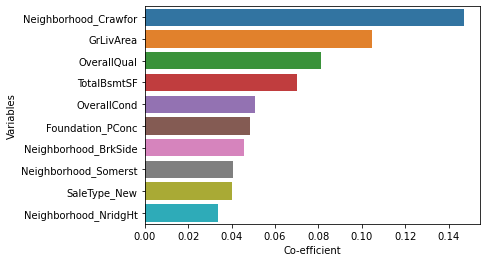

In [94]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

sns.barplot(y = 'Variables', x='Co-efficient', data = temp_lasso_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

- Neighborhood_Crawfor : Physical locations within Ames city limits (Crawford)
- GrLivArea : Ground floor Living Area
- OverallQual : Rates the overall material and finish of the house
- TotalBsmtSF : Total square feet of basement area
- OverallCond : Rates the overall condition of the house
- Condition1_Norm : Proximity to various conditions (Normal)
- Foundation_PConc : Type of foundation (Poured Contrete)
- Neighborhood_BrkSide : Physical locations within Ames city limits (Brookside)
- Neighborhood_Somerst :Physical locations within Ames city limits (Somerset)
- SaleType_New : Type of sale (Home just constructed and sold)
- Neighborhood_NridgHt : Physical locations within Ames city limits (Northridge Heights)

- **How well those variables describe the price of a house.**

In [95]:
#filtering dictionary for only non-zero coefficients

final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)

print("Total number of varaibles left after lasso -",len(final_dict))

Total number of varaibles left after lasso - 55


In [96]:
#sorting the coefficient dictionary
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))

#printing the final model equation
a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("SalePrice = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

SalePrice = 11.937+ [ 0.147 X Neighborhood_Crawfor + 0.104 X GrLivArea + 0.081 X OverallQual + 0.07 X TotalBsmtSF + 0.051 X OverallCond + 0.049 X Foundation_PConc + 0.046 X Neighborhood_BrkSide + 0.041 X Neighborhood_Somerst + 0.04 X SaleType_New + 0.034 X Neighborhood_NridgHt + 0.032 X Exterior2nd_Wd Sdng + 0.029 X LotArea + 0.027 X Foundation_CBlock + 0.022 X GarageCars + 0.019 X FullBath + 0.016 X Exterior1st_BrkFace + 0.015 X FireplaceQu + 0.015 X MasVnrType_Stone + 0.015 X GarageType_Attchd + 0.014 X HeatingQC + 0.014 X KitchenQual + 0.012 X BsmtFullBath + 0.012 X LotConfig_CulDSac + 0.011 X GarageYrBlt + 0.01 X Exterior2nd_Stucco + 0.009 X MSSubClass_70 + 0.008 X HalfBath + 0.006 X GarageQual + 0.006 X MSSubClass_50 + 0.006 X MSSubClass_120 + 0.005 X GarageFinish + 0.004 X HouseStyle_SLvl + 0.004 X Exterior1st_Plywood + 0.001 X BsmtQual + 0.001 X GarageType_Detchd + -0.003 X BsmtFinSF2 + -0.003 X HouseStyle_2.5Unf + -0.004 X LotConfig_FR2 + -0.007 X Neighborhood_Mitchel + -0.008 

The above equation explains how predictor variables describe the price of a house. Please note that the coefficient needs to be considered after scaling predictor variables.

---
**Subjective Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

---

In [97]:
# Getting the Top 5 most important predictor variables in the lasso model

lasso_df.head(5)

,Variables,Co-efficient
0,Neighborhood_Crawfor,0.1468
1,GrLivArea,0.1045
2,OverallQual,0.0810
3,TotalBsmtSF,0.0702
4,OverallCond,0.0506


In [98]:
# Splitting the target and predictors from the dataset

y = df_house['SalePrice']
X = df_house.drop(['SalePrice'], axis=1)

print('df_house.shape :',df_house.shape)
print('X.shape :',X.shape)
print('y.shape :',y.shape)

df_house.shape : (1275, 154)
X.shape : (1275, 153)
y.shape : (1275,)


In [99]:
# Splitting data in train & test with random state 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print('X_train.shape :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape :',X_test.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (892, 153)
y_train.shape : (892,)
X_test.shape : (383, 153)
y_test.shape : (383,)


In [100]:
# Dropping top 5 most important predictor variables present in the lasso model

X_train.drop(['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual','TotalBsmtSF','OverallCond'],axis = 1, inplace = True)
X_test.drop(['Neighborhood_Crawfor', 'GrLivArea', 'OverallQual','TotalBsmtSF','OverallCond'],axis = 1, inplace = True)

print('X_train.shape :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape :',X_test.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (892, 148)
y_train.shape : (892,)
X_test.shape : (383, 148)
y_test.shape : (383,)


In [101]:
# Initialising the MinMax Scaler
scaler = StandardScaler()

cols=X_train.select_dtypes(exclude=['uint8']).columns

# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [102]:
# Executing RFE with the output number of the variable as 100.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=100)
rfe = rfe.fit(X_train, y_train)

In [103]:
# Creating X_train dataframe with RFE selected variables i.e. support_ as True.

col = X_train.columns[rfe.support_]

X_train = X_train[col]

# getting values of X_train

X_train.head()

,LotArea,BsmtQual,BsmtCond,BsmtFinSF1,HeatingQC,1stFlrSF,2ndFlrSF,KitchenQual,GarageCars,house_age,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleType_others,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
360,0.723277,0.676217,0.200088,1.410191,0.951745,-0.018365,1.256878,0.891199,0.444684,-1.040793,...,0,0,0,0,0,0,0,0,0,1
1167,0.308297,0.676217,0.200088,-1.043528,0.951745,1.979210,-0.800958,0.891199,1.851275,-1.248594,...,0,0,0,0,0,0,0,0,0,1
365,2.557456,0.676217,0.200088,0.783928,-1.118881,-0.990868,1.124273,-0.676749,0.444684,-0.278854,...,0,0,0,0,0,0,0,0,0,1
1177,-0.643779,-0.426499,0.200088,0.645329,-1.118881,-0.553899,-0.800958,-0.676749,-0.961906,-0.486656,...,0,0,0,0,0,0,0,0,0,1
1095,-0.936373,-0.426499,0.200088,-0.406998,0.951745,-0.511187,-0.800958,-0.676749,-0.961906,0.552351,...,0,0,0,0,0,0,0,0,0,1


In [104]:
# Creating X_test dataframe with RFE selected variables i.e. support_ as True.

X_test = X_test[col]

# getting values of X_test

X_test.head()


,LotArea,BsmtQual,BsmtCond,BsmtFinSF1,HeatingQC,1stFlrSF,2ndFlrSF,KitchenQual,GarageCars,house_age,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleType_others,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
Id,,,,,,,,,,,,,,,,,,,,,
1348,1.613484,1.778932,0.200088,-0.838196,0.951745,2.248619,-0.800958,0.891199,1.851275,-1.283228,...,0,0,0,0,1,0,0,0,0,0
389,0.013002,0.676217,0.200088,-1.043528,0.951745,1.272830,-0.800958,0.891199,0.444684,-1.006159,...,0,0,0,0,0,0,0,0,0,1
733,0.559284,0.676217,0.200088,-0.396732,0.951745,0.201763,1.355105,0.891199,0.444684,-0.971526,...,0,0,0,0,0,0,0,0,0,1
877,4.309773,-0.426499,0.200088,0.581162,-0.083568,-0.169497,-0.800958,-0.676749,0.444684,0.206015,...,0,0,0,0,0,0,0,0,0,1
912,-0.012934,0.676217,1.465894,-0.540464,-1.118881,0.579593,-0.800958,0.891199,-0.961906,-0.209587,...,0,0,1,0,0,0,0,0,0,1


In [105]:
# Applying Lasso Regression

lasso = Lasso()

# List of alphas
params = {'alpha': [0.0002,0.0003,0.0004,0.0005,0.001,0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5]}


folds  = KFold(n_splits=5,shuffle=True,random_state=42)

# Preforming Grid Search
lasso_model_cv = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)            

# fitting the model
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

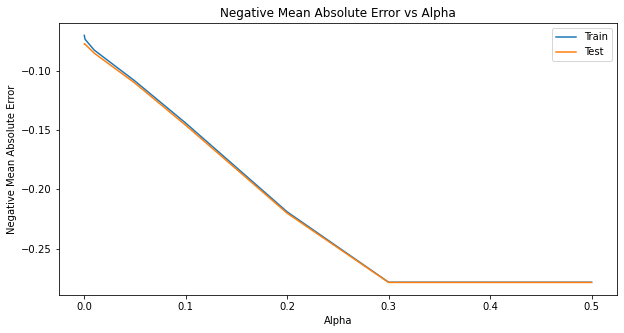

In [106]:
#plotting Negative Mean Absolute Error vs alpha value
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend()
plt.show()

In [107]:
# Getting the optimal value of alpha

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [108]:

# Building the model using optimal alpha value

alpha =0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

print('Train Accuracy')
print('------------------')
scores_(y_train, y_train_pred)
print('**************************************')
print('Test Accuracy')
print('------------------')
scores_(y_test,y_test_pred)

Train Accuracy
------------------
Mean Absolute Error (MAE) : 0.08213600919026055
Mean Squared Error (MSE): 0.012990859994712283
Root Mean Square Error (RMSE) : 0.11397745388765396
R2 Score: 0.8985603645286762
**************************************
Test Accuracy
------------------
Mean Absolute Error (MAE) : 0.0933559802513166
Mean Squared Error (MSE): 0.01782458954409354
Root Mean Square Error (RMSE) : 0.1335087620498877
R2 Score: 0.8571827681254987


In [109]:
# Finding the top 5 significant variables after the changes

df_lasso = pd.DataFrame({'Variables':X_train.columns, 'Co-efficient':lasso.coef_.round(4)})
df_lasso = df_lasso[df_lasso['Co-efficient'] != 0.00]
df_lasso = df_lasso.sort_values(by='Co-efficient', ascending=False).reset_index(drop=True)
df_lasso.head(5)

,Variables,Co-efficient
0,MSZoning_RL,0.2965
1,MSZoning_RH,0.2959
2,MSZoning_RM,0.2694
3,MSZoning_FV,0.2615
4,1stFlrSF,0.1225
